In [9]:
import os

In [13]:
data_dir='cell_images'
os.listdir(data_dir)

['test', 'train']

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
%matplotlib inline

In [20]:
test_path=data_dir+'/test'
train_path=data_dir+'/train'

In [21]:
os.listdir(test_path)

['parasitized', 'uninfected']

In [22]:
os.listdir(train_path)

['parasitized', 'uninfected']

In [23]:
os.listdir(train_path+'/parasitized')

['C189P150ThinF_IMG_20151203_142224_cell_84.png',
 'C91P52ThinF_IMG_20150821_123116_cell_189.png',
 'C84P45ThinF_IMG_20150818_101226_cell_98.png',
 'C144P105ThinF_IMG_20151015_163432_cell_310.png',
 'C136P97ThinF_IMG_20151005_141803_cell_131.png',
 'C60P21thinF_IMG_20150804_105034_cell_105.png',
 'C176P137NThinF_IMG_20151201_122708_cell_126.png',
 'C136P97ThinF_IMG_20151005_142437_cell_119.png',
 'C173P134NThinF_IMG_20151130_115733_cell_227.png',
 'C85P46ThinF_IMG_20150820_105154_cell_221.png',
 'C101P62ThinF_IMG_20150918_151507_cell_49.png',
 'C116P77ThinF_IMG_20150930_171844_cell_100.png',
 'C48P9thinF_IMG_20150721_160406_cell_247.png',
 'C184P145ThinF_IMG_20151203_103114_cell_149.png',
 'C99P60ThinF_IMG_20150918_141620_cell_56.png',
 'C132P93ThinF_IMG_20151004_152045_cell_111.png',
 'C68P29N_ThinF_IMG_20150819_134112_cell_153.png',
 'C116P77ThinF_IMG_20150930_171844_cell_114.png',
 'C171P132ThinF_IMG_20151119_153150_cell_222.png',
 'C176P137NThinF_IMG_20151201_122708_cell_132.png',


In [24]:
os.listdir(train_path+'/parasitized')[0]

'C189P150ThinF_IMG_20151203_142224_cell_84.png'

In [25]:
para_cell=(train_path+'/parasitized/C189P150ThinF_IMG_20151203_142224_cell_84.png')

In [26]:
para_cell

'cell_images/train/parasitized/C189P150ThinF_IMG_20151203_142224_cell_84.png'

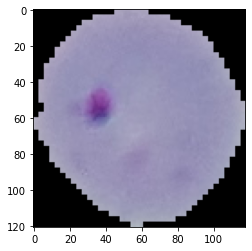

In [28]:
plt.imshow(imread(para_cell))

In [29]:
os.listdir(train_path+'/uninfected')[0]

'C13NThinF_IMG_20150614_131318_cell_179.png'

In [30]:
uninfected_cell=train_path+'/uninfected/C13NThinF_IMG_20150614_131318_cell_179.png';

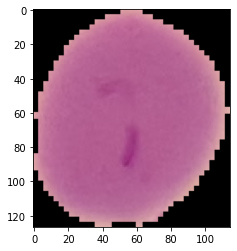

In [31]:
plt.imshow(imread(uninfected_cell))

In [33]:
len(os.listdir(train_path+'/parasitized'))

12480

In [36]:
len(os.listdir(train_path+'/uninfected'))

12480

In [37]:
len(os.listdir(test_path+'/parasitized'))

1300

In [35]:
len(os.listdir(test_path+'/uninfected'))

1300

In [38]:
dim1=[]
dim2=[]

for image_filename in os.listdir(test_path+'/uninfected'):
    img=imread(test_path+'/uninfected/'+image_filename)
    d1,d2,colors=img.shape
    dim1.append(d1)
    dim2.append(d2)

/Users/soumyajitpc/miniforge3/envs/python38-demo-v4/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


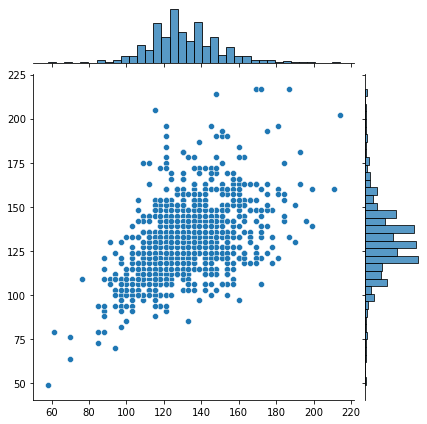

In [39]:
sns.jointplot(dim1,dim2)

In [40]:
np.mean(dim1)

130.92538461538462

In [41]:
np.mean(dim2)

130.75

In [42]:
image_shape=(130,130,3)

In [43]:
from keras.preprocessing.image import ImageDataGenerator

In [45]:
image_gen=ImageDataGenerator(rotation_range=20,
                            width_shift_range=0.1,
                            height_shift_range=0.1,
                            shear_range=0.1,
                            zoom_range=0.1,
                            horizontal_flip=True,
                            fill_mode='nearest',
                            )

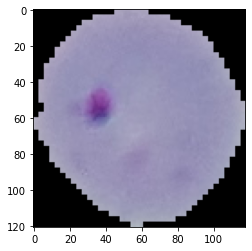

In [47]:
para_img=imread(para_cell)
plt.imshow(para_img)

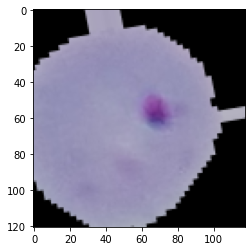

In [53]:
plt.imshow(image_gen.random_transform(para_img))

In [54]:
image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [55]:
image_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


In [56]:
from tensorflow.keras.models import Sequential

In [58]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Dropout,Flatten

In [60]:
model=Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [62]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)            

In [63]:
from tensorflow.keras.callbacks import EarlyStopping

In [64]:
early_stop=EarlyStopping(monitor='val_loss',patience=2)

In [65]:
batch_size=16

In [67]:
train_image_gen=image_gen.flow_from_directory(train_path,
                                             target_size=image_shape[:2],
                                             color_mode='rgb',
                                             batch_size=batch_size,
                                             class_mode='binary')

Found 24958 images belonging to 2 classes.


In [70]:
test_image_gen=image_gen.flow_from_directory(test_path,
                                             target_size=image_shape[:2],
                                             color_mode='rgb',
                                             batch_size=batch_size,
                                             class_mode='binary',shuffle=False)

Found 2600 images belonging to 2 classes.


In [71]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [72]:
results=model.fit_generator(train_image_gen,epochs=20,
                            validation_data=test_image_gen,
                            callbacks=[early_stop])

/Users/soumyajitpc/miniforge3/envs/python38-demo-v4/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
1560/1560 [==============================] - 92s 59ms/step - loss: 2.5508 - accuracy: 0.5458 - val_loss: 0.6833 - val_accuracy: 0.5538
Epoch 2/20
1560/1560 [==============================] - 91s 58ms/step - loss: 0.6900 - accuracy: 0.5597 - val_loss: 0.6755 - val_accuracy: 0.5688
Epoch 3/20
1560/1560 [==============================] - 92s 59ms/step - loss: 0.6422 - accuracy: 0.6474 - val_loss: 0.3111 - val_accuracy: 0.8865
Epoch 4/20
1560/1560 [==============================] - 93s 59ms/step - loss: 0.2759 - accuracy: 0.9109 - val_loss: 0.2290 - val_accuracy: 0.9296
Epoch 5/20
1560/1560 [==============================] - 97s 62ms/step - loss: 0.2572 - accuracy: 0.9284 - val_loss: 0.2071 - val_accuracy: 0.9427
Epoch 6/20
1560/1560 [==============================] - 104s 67ms/step - loss: 0.2286 - accuracy: 0.9352 - val_loss: 0.2393 - val_accuracy: 0.9396
Epoch 7/20
1560/1560 [==============================] - 107s 68ms/step - loss: 0.2601 - accuracy: 0.9342 - val_loss: 0.1847

In [74]:
import tensorflow as tf

In [78]:

tf.keras.models.save_model(
    model, 'malaria', overwrite=True, include_optimizer=True, save_format=None,
    signatures=None, options=None, save_traces=True
)


FOR DEVS: If you are overwriting _tracking_metadata in your class, this property has been used to save metadata in the SavedModel. The metadta field will be deprecated soon, so please move the metadata to a different file.
INFO:tensorflow:Assets written to: malaria/assets


In [79]:
model.evaluate_generator(test_image_gen)

/Users/soumyajitpc/miniforge3/envs/python38-demo-v4/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.2148544043302536, 0.943461537361145]

In [80]:
model.metrics_names

['loss', 'accuracy']

In [81]:
pred=model.predict(test_image_gen)

In [82]:
predictions=pred>0.5

In [83]:
len(pred)

2600

In [84]:
from sklearn.metrics import classification_report,confusion_matrix

In [85]:
test_image_gen.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [86]:
print(classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.96      0.91      0.94      1300
           1       0.92      0.96      0.94      1300

    accuracy                           0.94      2600
   macro avg       0.94      0.94      0.94      2600
weighted avg       0.94      0.94      0.94      2600



In [87]:
confusion_matrix(test_image_gen.classes,predictions)

array([[1187,  113],
       [  51, 1249]])

In [88]:
from tensorflow.keras.preprocessing import image

In [91]:
my_img=image.load_img(para_cell,target_size=image_shape)

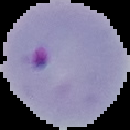

In [92]:
my_img

In [93]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)            

In [104]:
my_img_arr=image.img_to_array(my_img)

In [105]:
my_img_arr

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [106]:
my_img_arr.shape

(130, 130, 3)

In [107]:
my_img_arr=np.expand_dims(my_img_arr,axis=0)

In [108]:
my_img_arr.shape

(1, 130, 130, 3)

In [111]:
model.predict(my_img_arr)>0.5

array([[False]])

In [113]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

#### The cell is parasitized as is evident from the image